In [13]:
from bentdna.avg_shape import AvgShapeWindows
import matplotlib.pyplot as plt
import numpy as np
bentna_folder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
n_frames_per_window = 5000
a_agent = AvgShapeWindows(bentna_folder, host, n_frames_per_window)

In [3]:
#a_agent.get_split_frame_list()

[(1, 5001),
 (2501, 7501),
 (5001, 10001),
 (7501, 12501),
 (10001, 15001),
 (12501, 17501),
 (15001, 20001),
 (17501, 22501),
 (20001, 25001),
 (22501, 27501),
 (25001, 30001),
 (27501, 32501),
 (30001, 35001),
 (32501, 37501),
 (35001, 40001),
 (37501, 42501),
 (40001, 45001),
 (42501, 47501),
 (45001, 50001)]

### Part 2: Read $l_i$ and $\theta$

In [4]:
a_agent.read_l_modulus_theta()

Read /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/l_theta/l_modulus_theta_21_beads.csv


In [5]:
a_agent.df_l_modulus_theta.head()

,Frame_ID,i,j,|l_i|,|l_j|,theta
0,0,0,1,3.348145,3.234820,0.052631
1,0,0,2,3.348145,3.920404,0.037771
2,0,0,3,3.348145,2.740081,0.121389
3,0,0,4,3.348145,3.665655,0.164109
4,0,0,5,3.348145,3.481909,0.188460


### Part 3: Split all frames data into time windows

In [5]:
a_agent.set_split_df_list()

In [5]:
#split_df_list = a_agent.get_split_df_list()
#split_df_list[18].shape # key: 0-18

### Part 4: Make/Read shapes of all windows

In [6]:
execute = False
if execute:
    a_agent.set_shape_store_array()
    a_agent.save_shape_store_array()　

Start to process Window-0
Start to process Window-1
Start to process Window-2
Start to process Window-3
Start to process Window-4
Start to process Window-5
Start to process Window-6
Start to process Window-7
Start to process Window-8
Start to process Window-9
Start to process Window-10
Start to process Window-11
Start to process Window-12
Start to process Window-13
Start to process Window-14
Start to process Window-15
Start to process Window-16
Start to process Window-17
Start to process Window-18
Save shapes of all windows into /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/l_theta/shape_store_array.npy


In [9]:
a_agent.read_shape_store_array()

Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/l_theta/shape_store_array.npy


### Part 5: Plot $\theta^0(\textbf{r})$ for Group 1

In [30]:
n_frames_per_window = 5000
group1_hosts = ['a_tract_21mer', 'tat_21mer', 'g_tract_21mer', 'gcgc_21mer']

In [41]:
d_colors = {'a_tract_21mer': 'blue', 'atat_21mer': 'orange', 'ctct_21mer': 'green',
                'g_tract_21mer': 'red', 'gcgc_21mer': 'magenta', 'tgtg_21mer': 'cyan', 
                'tat_21mer': 'purple', 'tat_1_21mer': 'magenta', 'tat_2_21mer': 'green',
                'tat_3_21mer': 'cyan'}

abbr_hosts = {'a_tract_21mer': 'A-tract', 'ctct_21mer': 'CTCT', 'gcgc_21mer': 'CpG',
                  'g_tract_21mer': 'G-tract', 'atat_21mer': 'ATAT', 'tgtg_21mer': 'TGTG', 
                  'tat_21mer': 'A-junction', 'tat_1_21mer': 'TAT-1', 'tat_2_21mer': 'TAT-2', 'tat_3_21mer': 'TAT-3'} 

In [15]:
xticks = range(15)
xticklabels = list()
start_idx = 4
for bp_id in xticks:
    idx = start_idx + bp_id
    xticklabels.append(r'$\mathbf{r}_{' + f'{idx}' +r'}$')

Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/l_theta/shape_store_array.npy


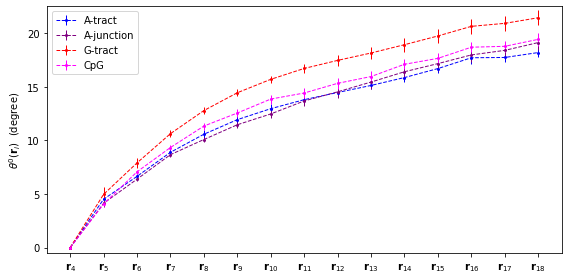

In [43]:
fig, ax = plt.subplots(figsize=(8,4), facecolor="white")
ylims = (-0.5,22.5)

for host in group1_hosts:
    a_agent = AvgShapeWindows(bentna_folder, host, n_frames_per_window)
    a_agent.read_shape_store_array()
    mean_array, std_array = a_agent.get_mean_std_array_for_windows()
    x_array = list(range(len(mean_array)))
    ax.errorbar(x_array, np.rad2deg(mean_array), yerr=np.rad2deg(std_array), linestyle='--', marker='.', linewidth=1, 
                markersize=4, label=abbr_hosts[host], alpha=1, color=d_colors[host])
ax.legend()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$\theta^{0}(\mathbf{r}_i)$  (degree)')
ax.set_ylim(ylims)

plt.tight_layout()
#plt.savefig('/home/yizaochen/Desktop/drawzone_temp/avg_theta_1.png', dpi=150, transparent=False)
plt.show()

### Part : Plot $\theta^0(\textbf{r})$ for Group 2

In [28]:
group2_hosts = ['a_tract_21mer', 'tat_21mer', 'tat_1_21mer', 'tat_2_21mer', 'tat_3_21mer', 'atat_21mer']

Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_1_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_2_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_3_21mer/l_theta/shape_store_array.npy
Read shape_store_array from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/l_theta/shape_store_array.npy


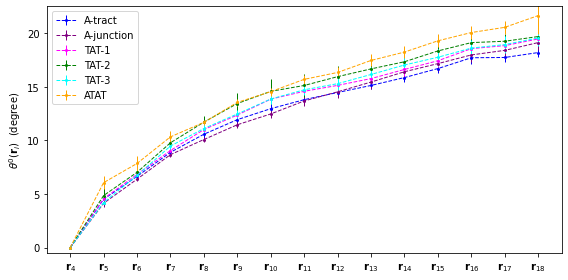

In [44]:
fig, ax = plt.subplots(figsize=(8,4), facecolor="white")
ylims = (-0.5,22.5)

for host in group2_hosts:
    a_agent = AvgShapeWindows(bentna_folder, host, n_frames_per_window)
    a_agent.read_shape_store_array()
    mean_array, std_array = a_agent.get_mean_std_array_for_windows()
    x_array = list(range(len(mean_array)))
    ax.errorbar(x_array, np.rad2deg(mean_array), yerr=np.rad2deg(std_array), linestyle='--', marker='.', linewidth=1, 
                markersize=4, label=abbr_hosts[host], alpha=1, color=d_colors[host])
ax.legend()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$\theta^{0}(\mathbf{r}_i)$  (degree)')
ax.set_ylim(ylims)

plt.tight_layout()
#plt.savefig('/home/yizaochen/Desktop/drawzone_temp/avg_theta_2.png', dpi=150, transparent=False)
plt.show()

### Batch Run

In [ ]:
hosts = ['g_tract_21mer', 'gcgc_21mer', 'tat_21mer', 'tat_1_21mer', 'tat_2_21mer', 'tat_3_21mer', 'atat_21mer']
n_frames_per_window = 5000
for host in hosts:
    a_agent = AvgShapeWindows(bentna_folder, host, n_frames_per_window)
    #a_agent.read_l_modulus_theta()
    #a_agent.set_split_df_list()
    #a_agent.set_shape_store_array()
    #a_agent.save_shape_store_array()